In [ ]:
!sudo apt update
!sudo apt-get install python3.9
!python3.9 --version
!pip install tensorflow==2.9.*
!pip install opencv-python
!pip install -U matplotlib
!pip install numpy
!pip install -U scikit-learn

### RNN

In [39]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras.models import load_model

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Reshape, Flatten

In [40]:

# 1. Load data from .csv
def load_from_csv(train_file, test_file):
    train_data = pd.read_csv(train_file).values
    test_data = pd.read_csv(test_file).values

    train_images = train_data[:, 1:].reshape(-1, 28, 28, 1).astype('float32') / 255
    train_labels = train_data[:, 0]

    test_images = test_data[:, 1:].reshape(-1, 28, 28, 1).astype('float32') / 255
    test_labels = test_data[:, 0]

    return (train_images, train_labels), (test_images, test_labels)

train_file = 'emnist-letters-train.csv'
test_file = 'emnist-letters-test.csv'
(train_images, train_labels), (test_images, test_labels) = load_from_csv(train_file, test_file)

# Convert labels to one-hot encoding
train_labels = keras.utils.to_categorical(train_labels,num_classes=27)
test_labels = keras.utils.to_categorical(test_labels,num_classes=27)


In [42]:
# Convert number to text a = 1 ... z = 26
def number_to_text(n):
    if 1 <= n <= 26:
        return chr(96 + n)
    else:
        raise ValueError("The number should be between 1 and 26.")

463/463 [==============================] - 5s 6ms/step - loss: 0.5698 - accuracy: 0.8201
Test lost: 56.98%
Test accuracy: 82.01%
463/463 [==============================] - 2s 4ms/step


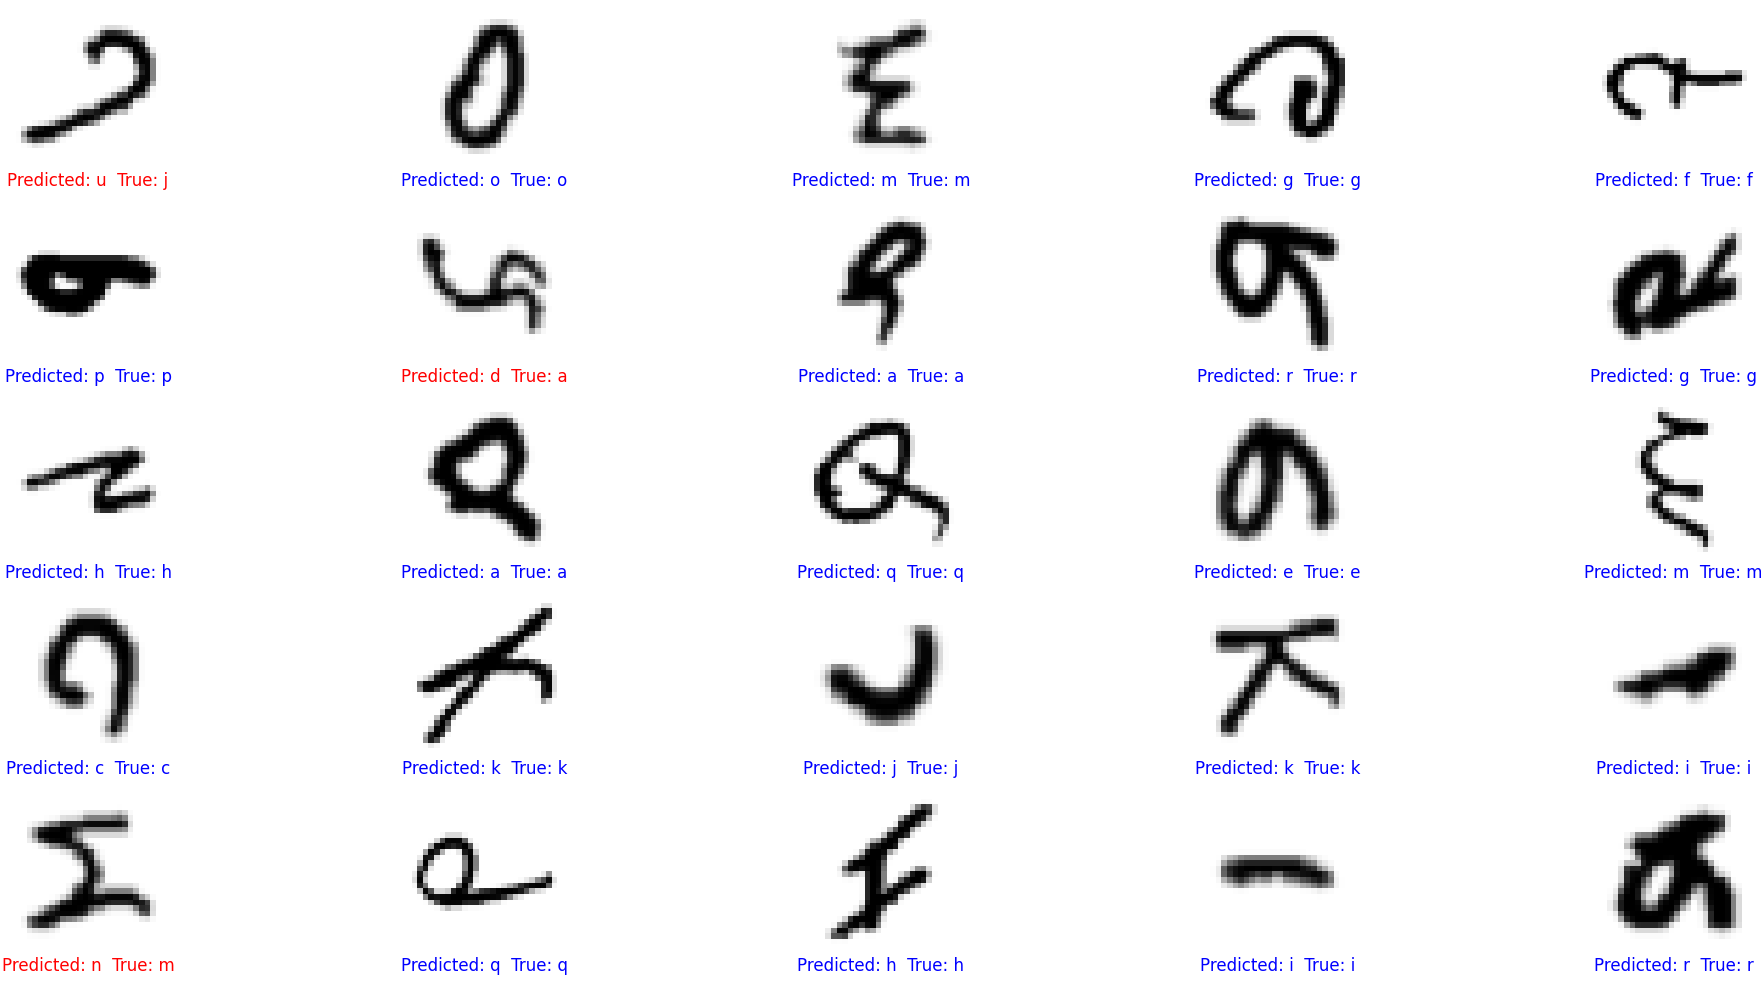

In [79]:
model_path = '/content/data_set/rnn_epochs_8.h5'
model = load_model(model_path)

from random import randint

# Evaluate and Predict
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test lost: {loss*100:.2f}%")
print(f"Test accuracy: {accuracy*100:.2f}%")
predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

max_text_images = len(test_images)

# Visualization function
def plot_image(i, predictions_array, true_label, images):
    predictions_array, true_label, img = predictions_array[i], true_label[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"Predicted: {number_to_text(predicted_label)}  True: {number_to_text(true_label)}", color=color)

# Plot some test images along with their predictions
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    random_image = randint(1,max_text_images)
    plot_image(random_image, predictions, true_classes, test_images.reshape(-1, 28, 28))

plt.tight_layout()
plt.show()

463/463 [==============================] - 2s 4ms/step - loss: 0.4012 - accuracy: 0.8753
Test lost: 40.12%
Test accuracy: 87.53%
463/463 [==============================] - 4s 8ms/step


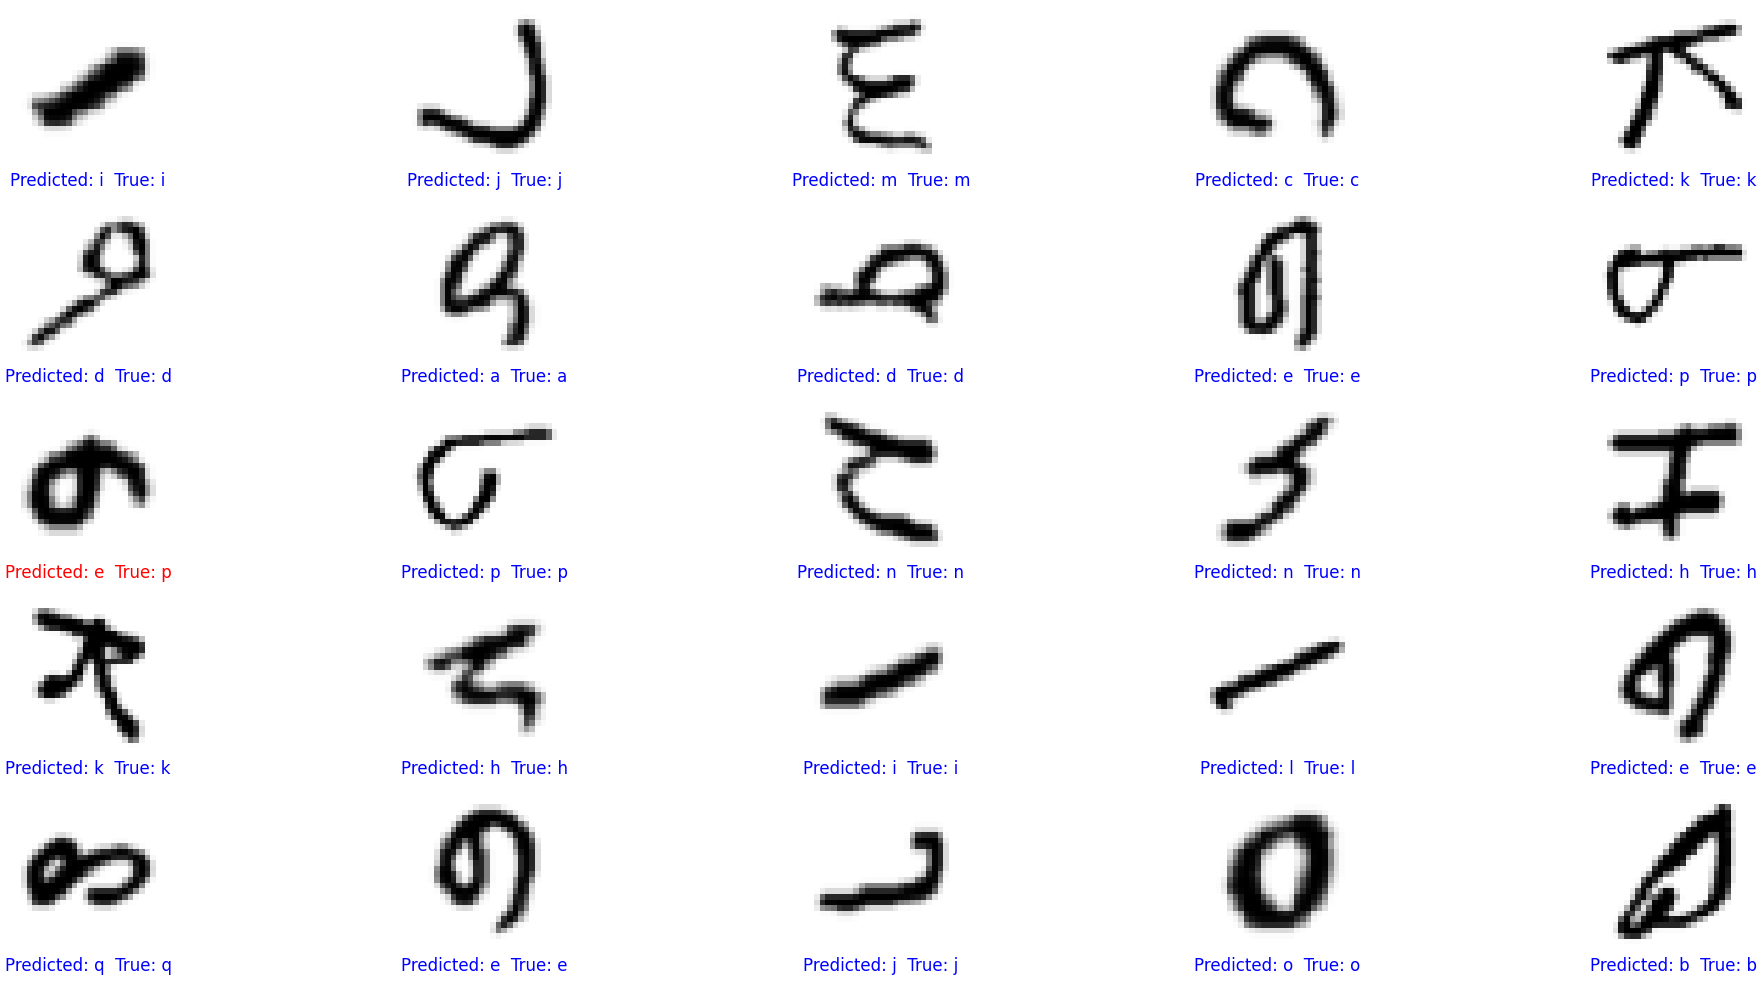

In [49]:
model_path = '/content/data_set/rnn_epochs_32.h5'
model = load_model(model_path)

from random import randint

# Evaluate and Predict
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test lost: {loss*100:.2f}%")
print(f"Test accuracy: {accuracy*100:.2f}%")
predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

max_text_images = len(test_images)

# Visualization function
def plot_image(i, predictions_array, true_label, images):
    predictions_array, true_label, img = predictions_array[i], true_label[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"Predicted: {number_to_text(predicted_label)}  True: {number_to_text(true_label)}", color=color)

# Plot some test images along with their predictions
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    random_image = randint(1,max_text_images)
    plot_image(random_image, predictions, true_classes, test_images.reshape(-1, 28, 28))

plt.tight_layout()
plt.show()

463/463 [==============================] - 2s 5ms/step - loss: 0.3289 - accuracy: 0.8984
Test lost: 32.89%
Test accuracy: 89.84%
463/463 [==============================] - 2s 4ms/step


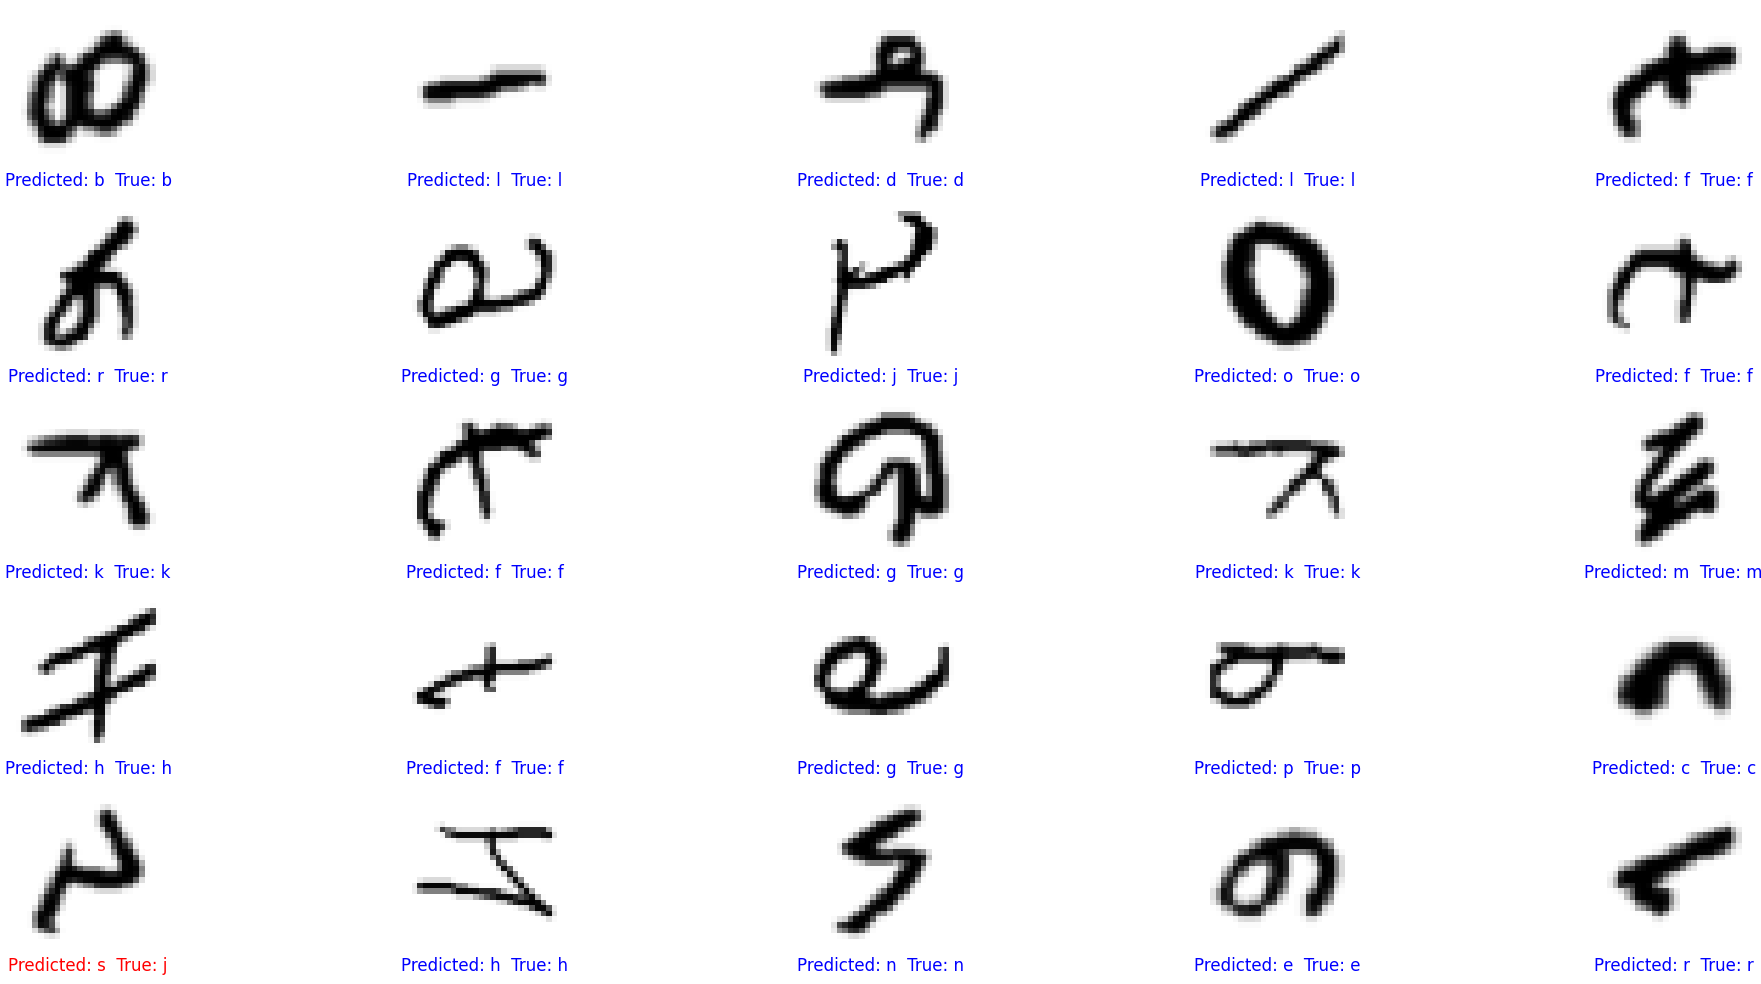

In [48]:
model_path = '/content/data_set/rnn_epochs_128.h5'
model = load_model(model_path)

from random import randint

# Evaluate and Predict
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test lost: {loss*100:.2f}%")
print(f"Test accuracy: {accuracy*100:.2f}%")
predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

max_text_images = len(test_images)

# Visualization function
def plot_image(i, predictions_array, true_label, images):
    predictions_array, true_label, img = predictions_array[i], true_label[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"Predicted: {number_to_text(predicted_label)}  True: {number_to_text(true_label)}", color=color)

# Plot some test images along with their predictions
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    random_image = randint(1,max_text_images)
    plot_image(random_image, predictions, true_classes, test_images.reshape(-1, 28, 28))

plt.tight_layout()
plt.show()

463/463 [==============================] - 3s 5ms/step - loss: 0.3013 - accuracy: 0.9029
Test lost: 30.13%
Test accuracy: 90.29%
463/463 [==============================] - 3s 6ms/step


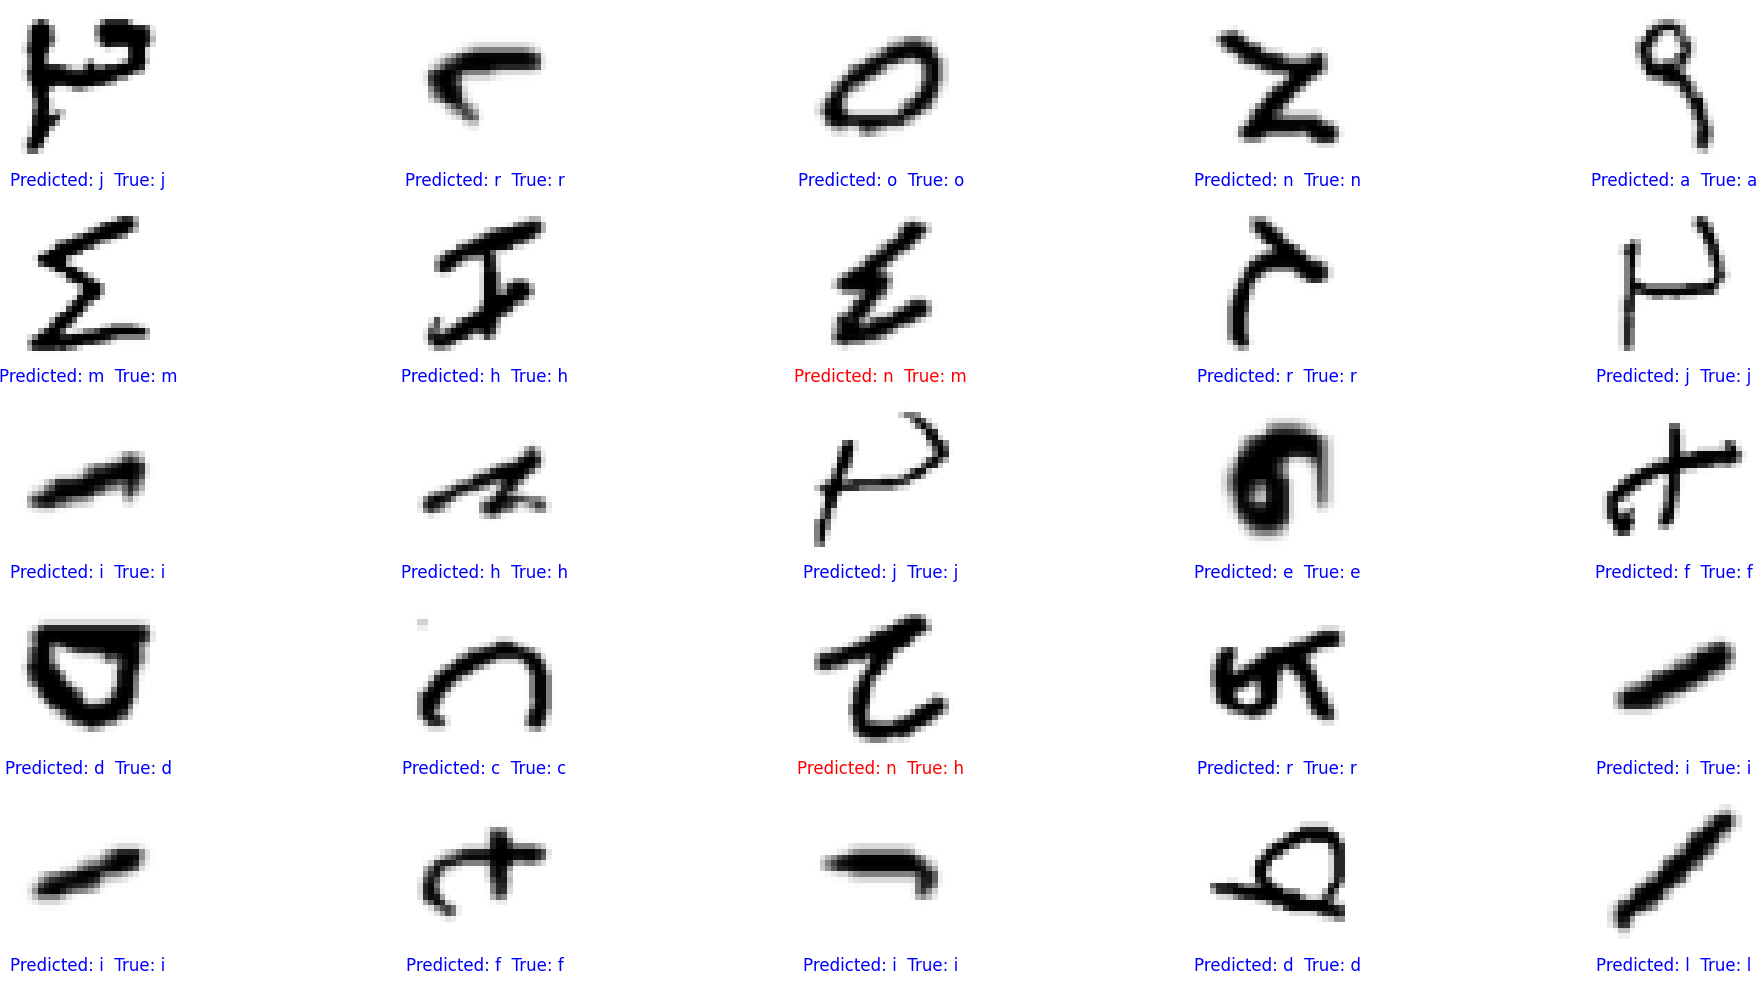

In [47]:
model_path = '/content/data_set/rnn_epochs_512.h5'
model = load_model(model_path)

from random import randint

# Evaluate and Predict
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test lost: {loss*100:.2f}%")
print(f"Test accuracy: {accuracy*100:.2f}%")
predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

max_text_images = len(test_images)

# Visualization function
def plot_image(i, predictions_array, true_label, images):
    predictions_array, true_label, img = predictions_array[i], true_label[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"Predicted: {number_to_text(predicted_label)}  True: {number_to_text(true_label)}", color=color)

# Plot some test images along with their predictions
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    random_image = randint(1,max_text_images)
    plot_image(random_image, predictions, true_classes, test_images.reshape(-1, 28, 28))

plt.tight_layout()
plt.show()

### ตาราง RNN

In [62]:
import json

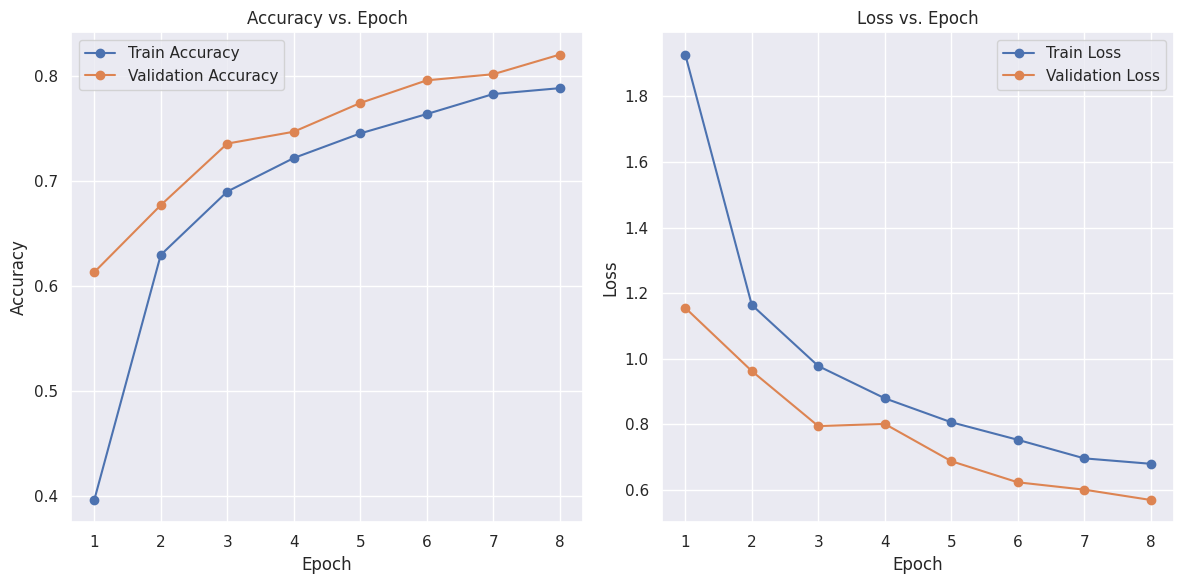

In [63]:
# Load training history from the JSON file
with open('/content/data_set/rnn_epochs_8_history.json', 'r') as json_file:
    history_data = json.load(json_file)

N = len(history_data['accuracy'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, N+1), history_data["accuracy"], label="Train Accuracy", marker='o')
plt.plot(range(1, N+1), history_data["val_accuracy"], label="Validation Accuracy", marker='o')
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, N+1), history_data['loss'], label="Train Loss", marker='o')
plt.plot(range(1, N+1), history_data['val_loss'], label="Validation Loss", marker='o')
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

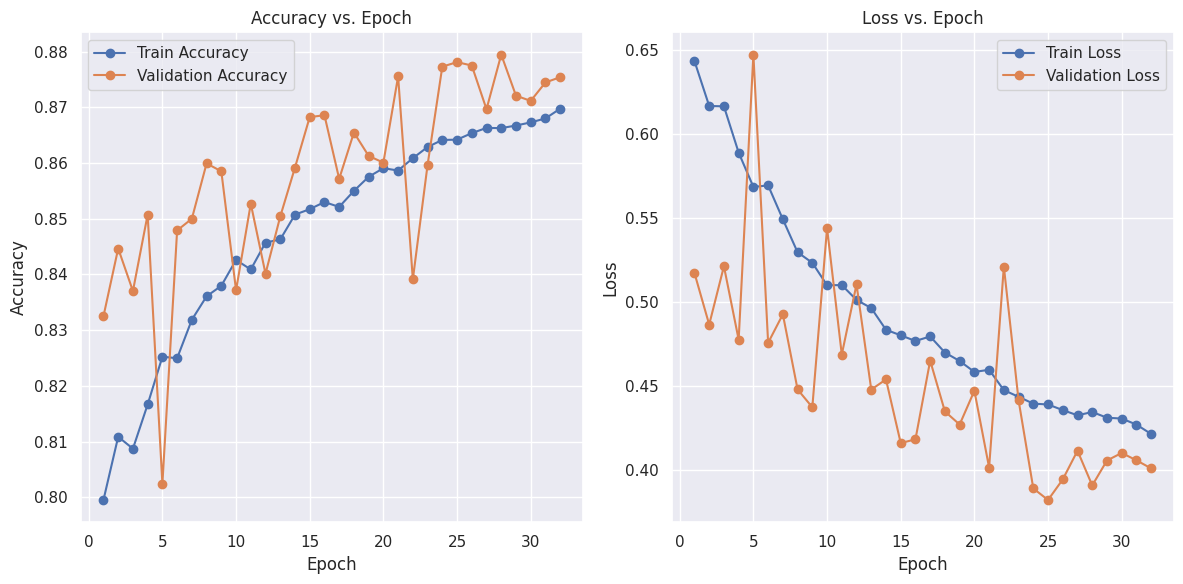

In [64]:
# Load training history from the JSON file
with open('/content/data_set/rnn_epochs_32_history.json', 'r') as json_file:
    history_data = json.load(json_file)

N = len(history_data['accuracy'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, N+1), history_data["accuracy"], label="Train Accuracy", marker='o')
plt.plot(range(1, N+1), history_data["val_accuracy"], label="Validation Accuracy", marker='o')
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, N+1), history_data['loss'], label="Train Loss", marker='o')
plt.plot(range(1, N+1), history_data['val_loss'], label="Validation Loss", marker='o')
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

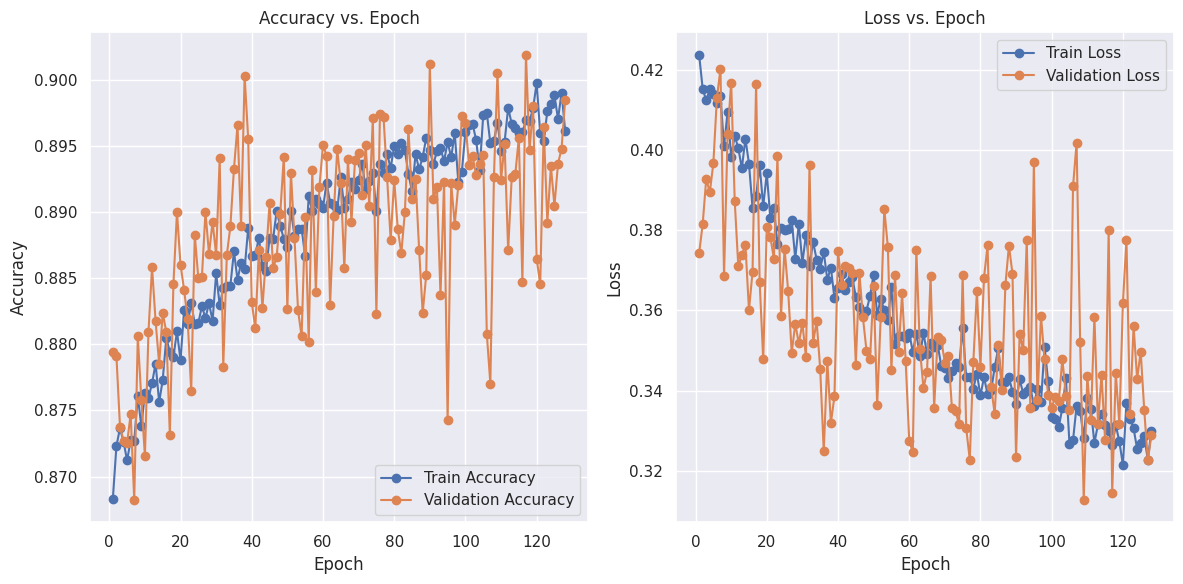

In [65]:
# Load training history from the JSON file
with open('/content/data_set/rnn_epochs_128_history.json', 'r') as json_file:
    history_data = json.load(json_file)

N = len(history_data['accuracy'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, N+1), history_data["accuracy"], label="Train Accuracy", marker='o')
plt.plot(range(1, N+1), history_data["val_accuracy"], label="Validation Accuracy", marker='o')
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, N+1), history_data['loss'], label="Train Loss", marker='o')
plt.plot(range(1, N+1), history_data['val_loss'], label="Validation Loss", marker='o')
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

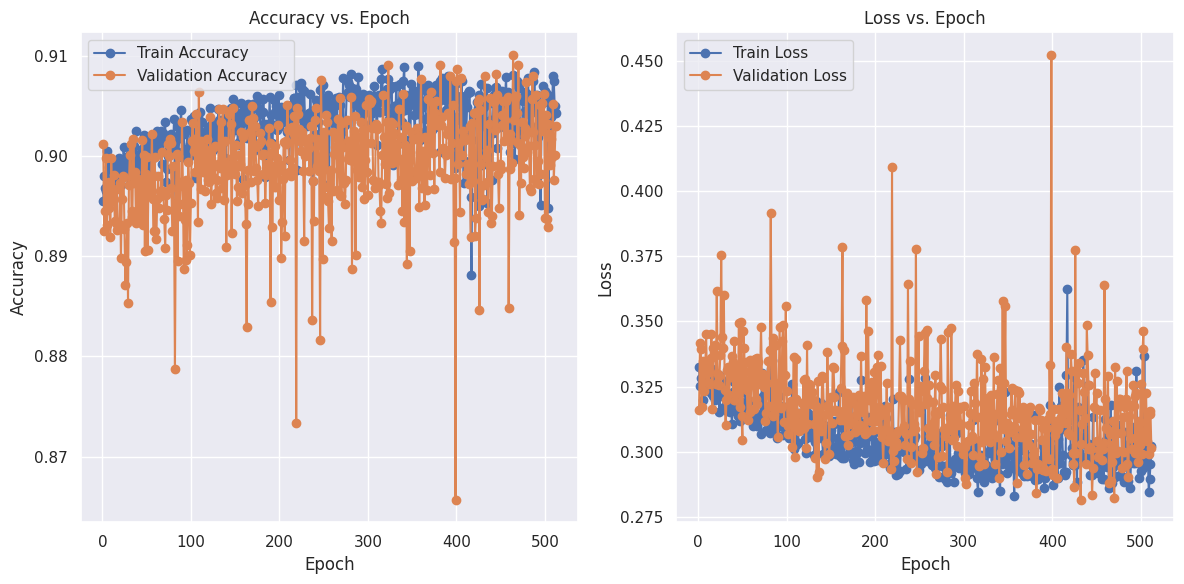

In [66]:
# Load training history from the JSON file
with open('/content/data_set/rnn_epochs_512_history.json', 'r') as json_file:
    history_data = json.load(json_file)

N = len(history_data['accuracy'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, N+1), history_data["accuracy"], label="Train Accuracy", marker='o')
plt.plot(range(1, N+1), history_data["val_accuracy"], label="Validation Accuracy", marker='o')
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, N+1), history_data['loss'], label="Train Loss", marker='o')
plt.plot(range(1, N+1), history_data['val_loss'], label="Validation Loss", marker='o')
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

### lstm

463/463 [==============================] - 13s 27ms/step - loss: 0.2716 - accuracy: 0.9072
Test lost: 27.16%
Test accuracy: 90.72%
463/463 [==============================] - 7s 14ms/step


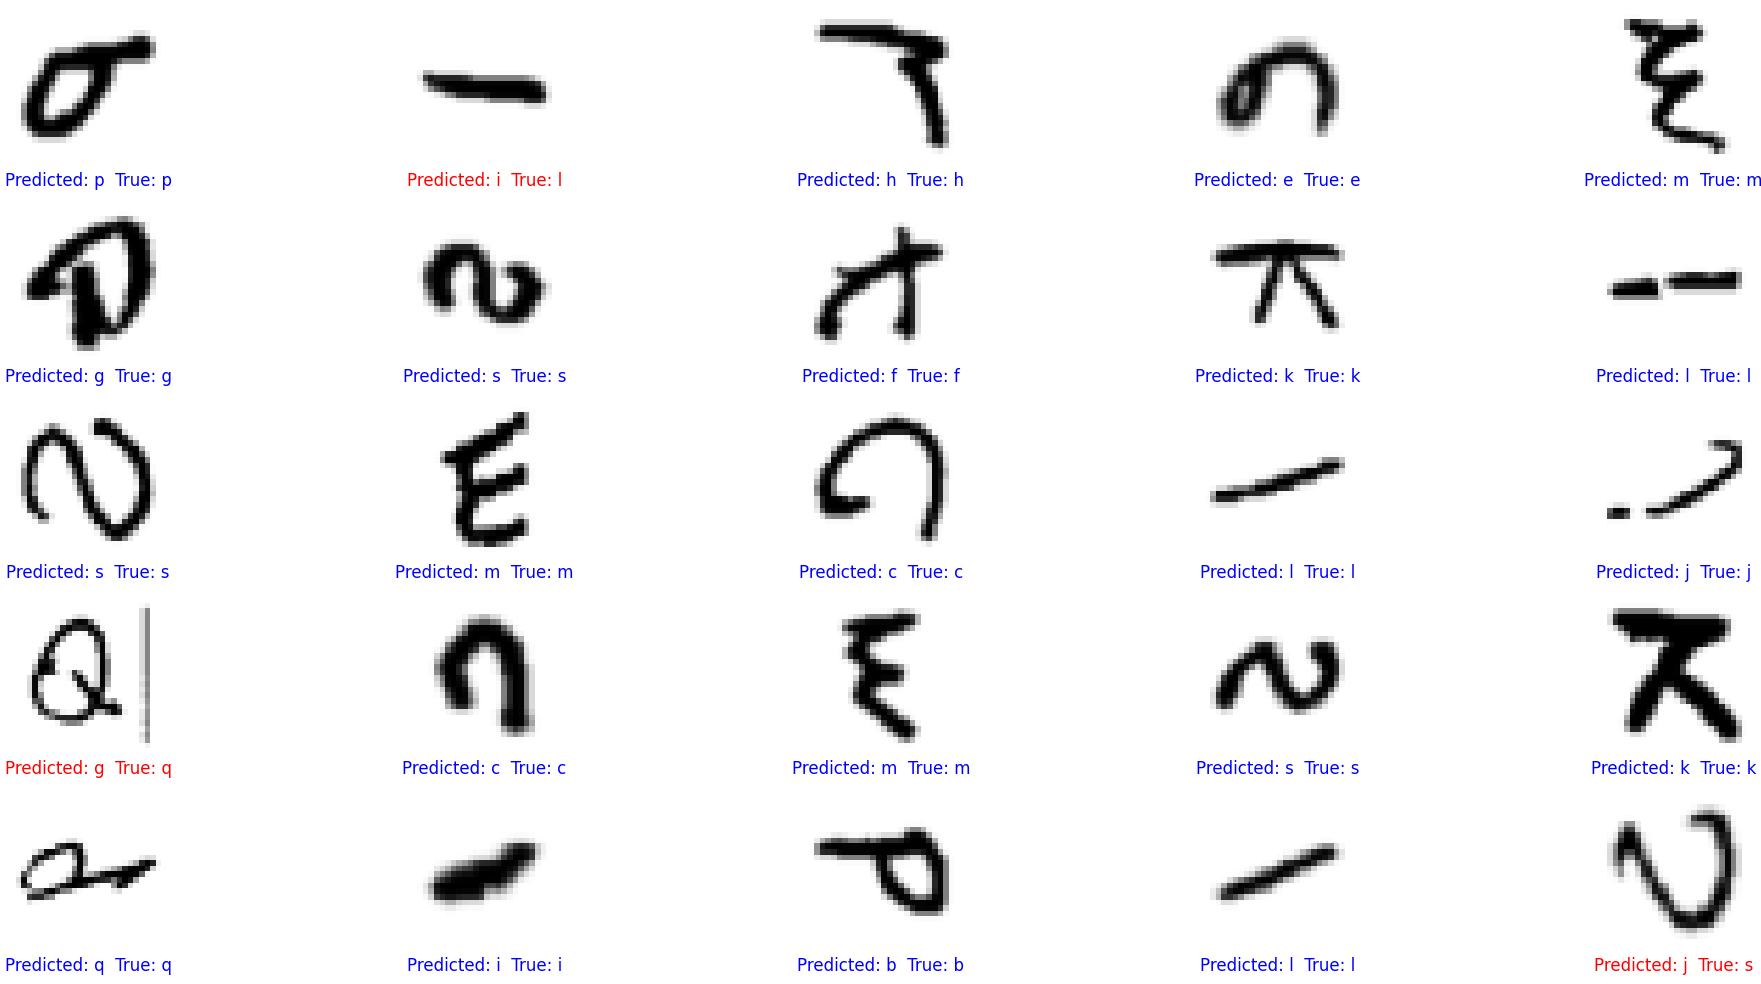

In [54]:
model_path = '/content/data_set/lstm_epochs_8.h5'
model = load_model(model_path)

from random import randint

# Evaluate and Predict
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test lost: {loss*100:.2f}%")
print(f"Test accuracy: {accuracy*100:.2f}%")
predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

max_text_images = len(test_images)

# Visualization function
def plot_image(i, predictions_array, true_label, images):
    predictions_array, true_label, img = predictions_array[i], true_label[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"Predicted: {number_to_text(predicted_label)}  True: {number_to_text(true_label)}", color=color)

# Plot some test images along with their predictions
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    random_image = randint(1,max_text_images)
    plot_image(random_image, predictions, true_classes, test_images.reshape(-1, 28, 28))

plt.tight_layout()
plt.show()

463/463 [==============================] - 12s 23ms/step - loss: 0.2108 - accuracy: 0.9278
Test lost: 21.08%
Test accuracy: 92.78%
463/463 [==============================] - 9s 19ms/step


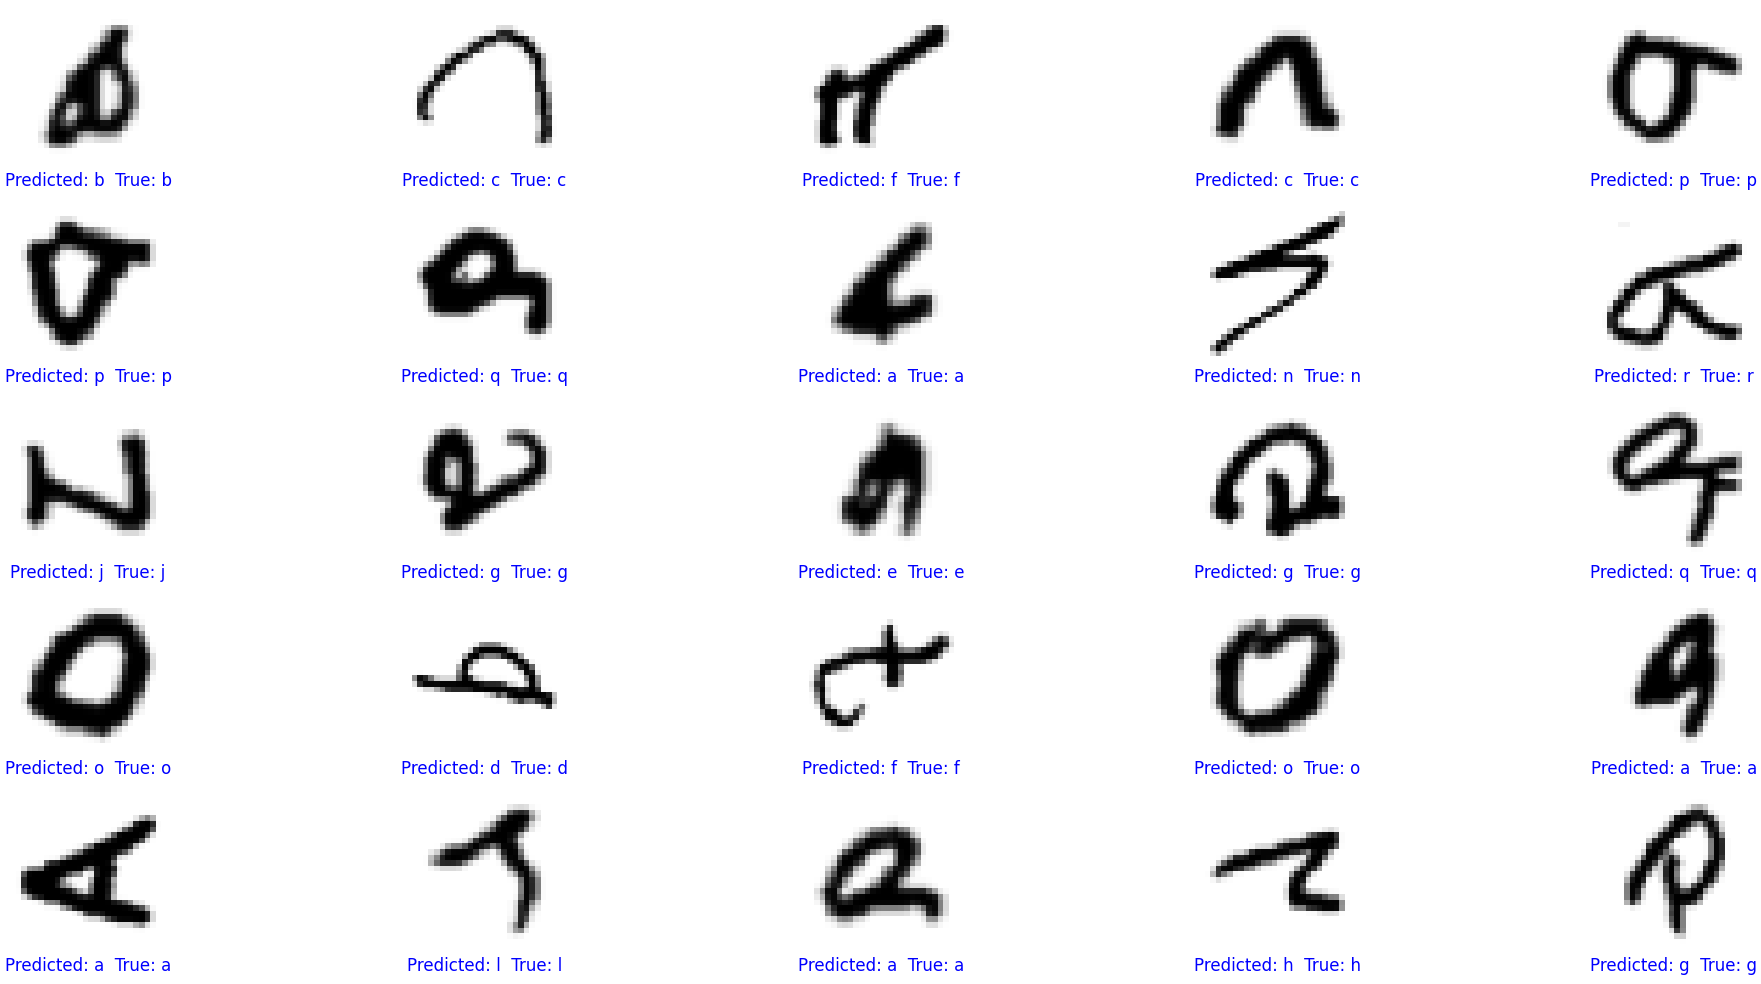

In [53]:
model_path = '/content/data_set/lstm_epochs_32.h5'
model = load_model(model_path)

from random import randint

# Evaluate and Predict
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test lost: {loss*100:.2f}%")
print(f"Test accuracy: {accuracy*100:.2f}%")
predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

max_text_images = len(test_images)

# Visualization function
def plot_image(i, predictions_array, true_label, images):
    predictions_array, true_label, img = predictions_array[i], true_label[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"Predicted: {number_to_text(predicted_label)}  True: {number_to_text(true_label)}", color=color)

# Plot some test images along with their predictions
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    random_image = randint(1,max_text_images)
    plot_image(random_image, predictions, true_classes, test_images.reshape(-1, 28, 28))

plt.tight_layout()
plt.show()

463/463 [==============================] - 11s 23ms/step - loss: 0.2335 - accuracy: 0.9275
Test lost: 23.35%
Test accuracy: 92.75%
463/463 [==============================] - 11s 22ms/step


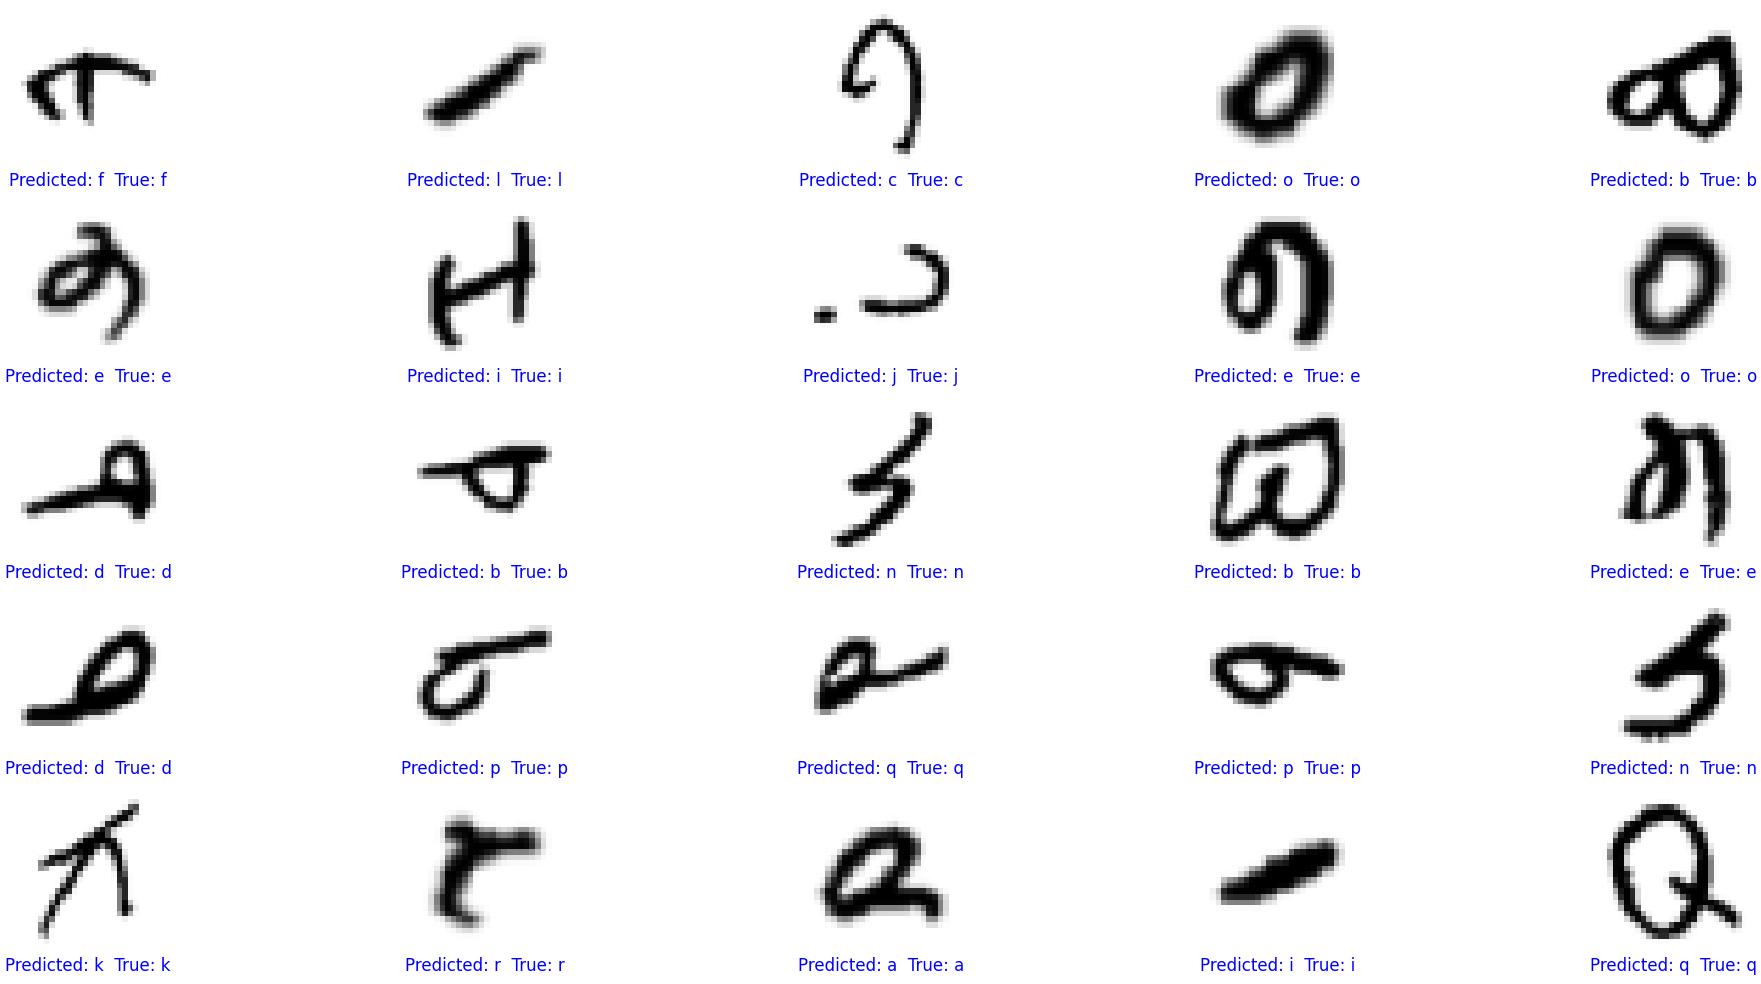

In [52]:
model_path = '/content/data_set/lstm_epochs_128.h5'
model = load_model(model_path)

from random import randint

# Evaluate and Predict
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test lost: {loss*100:.2f}%")
print(f"Test accuracy: {accuracy*100:.2f}%")
predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

max_text_images = len(test_images)

# Visualization function
def plot_image(i, predictions_array, true_label, images):
    predictions_array, true_label, img = predictions_array[i], true_label[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"Predicted: {number_to_text(predicted_label)}  True: {number_to_text(true_label)}", color=color)

# Plot some test images along with their predictions
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    random_image = randint(1,max_text_images)
    plot_image(random_image, predictions, true_classes, test_images.reshape(-1, 28, 28))

plt.tight_layout()
plt.show()

463/463 [==============================] - 13s 27ms/step - loss: 0.2700 - accuracy: 0.9297
Test lost: 27.00%
Test accuracy: 92.97%
463/463 [==============================] - 13s 27ms/step


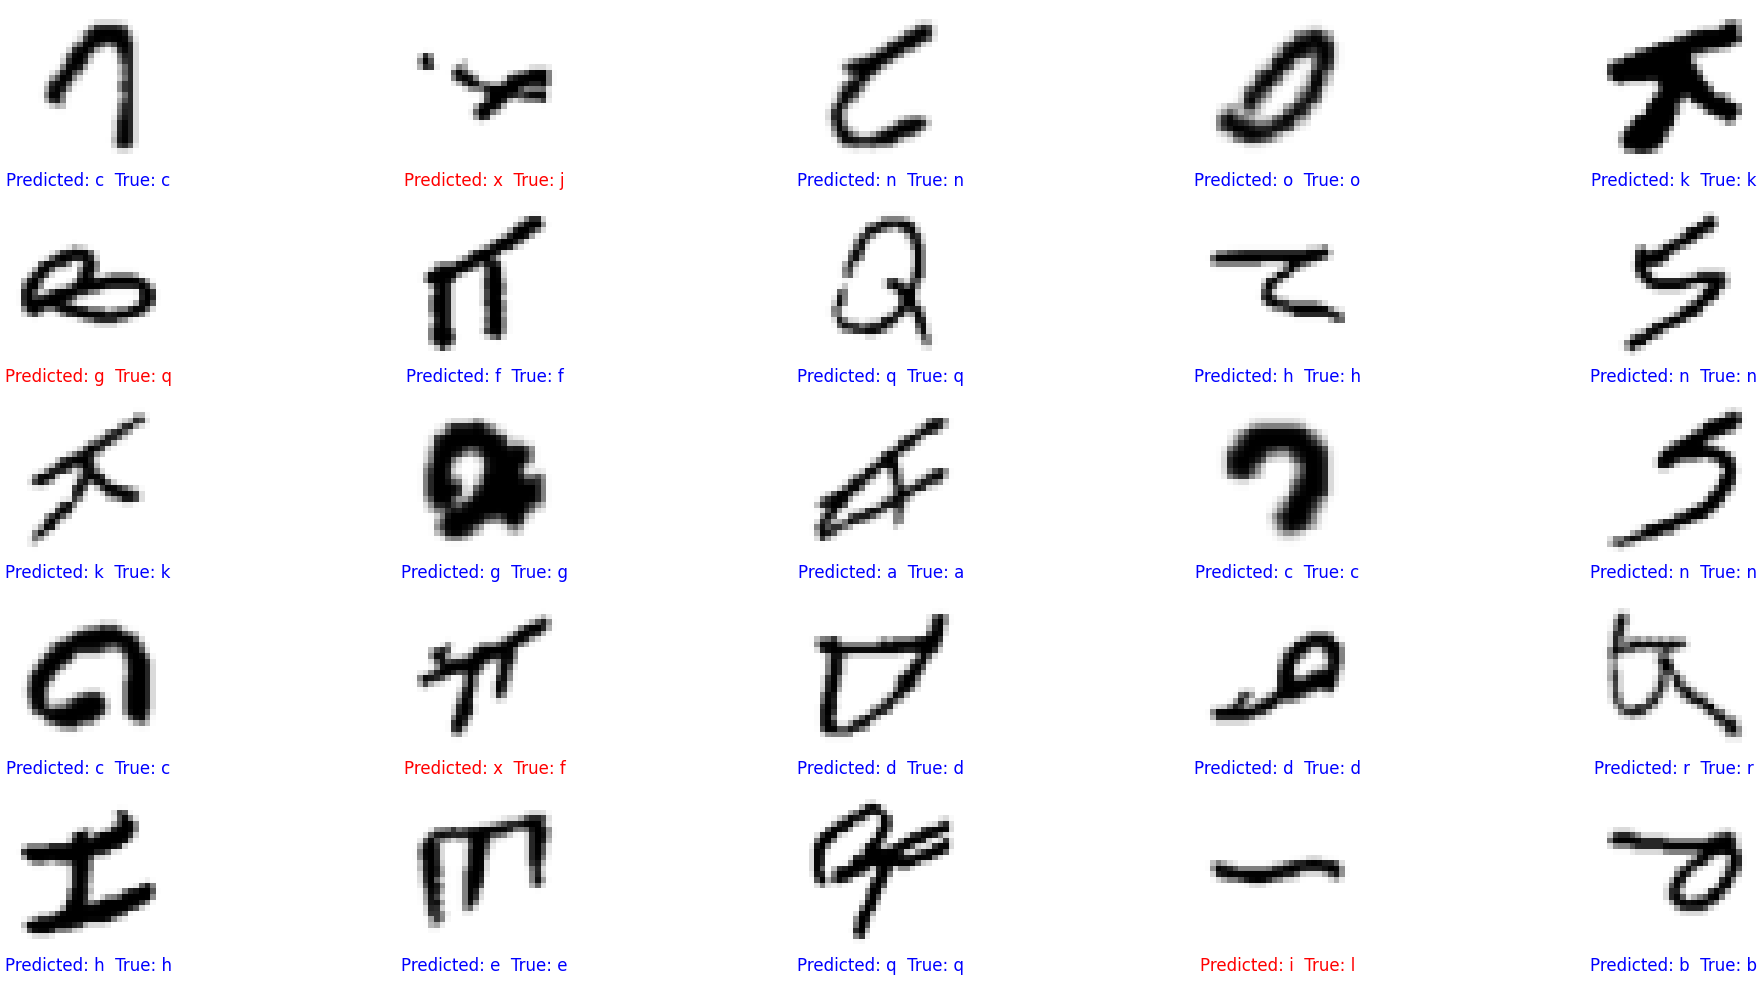

In [51]:
model_path = '/content/data_set/lstm_epochs_512.h5'
model = load_model(model_path)

from random import randint

# Evaluate and Predict
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test lost: {loss*100:.2f}%")
print(f"Test accuracy: {accuracy*100:.2f}%")
predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

max_text_images = len(test_images)

# Visualization function
def plot_image(i, predictions_array, true_label, images):
    predictions_array, true_label, img = predictions_array[i], true_label[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"Predicted: {number_to_text(predicted_label)}  True: {number_to_text(true_label)}", color=color)

# Plot some test images along with their predictions
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    random_image = randint(1,max_text_images)
    plot_image(random_image, predictions, true_classes, test_images.reshape(-1, 28, 28))

plt.tight_layout()
plt.show()

### ตาราง LSTM

In [56]:
import json

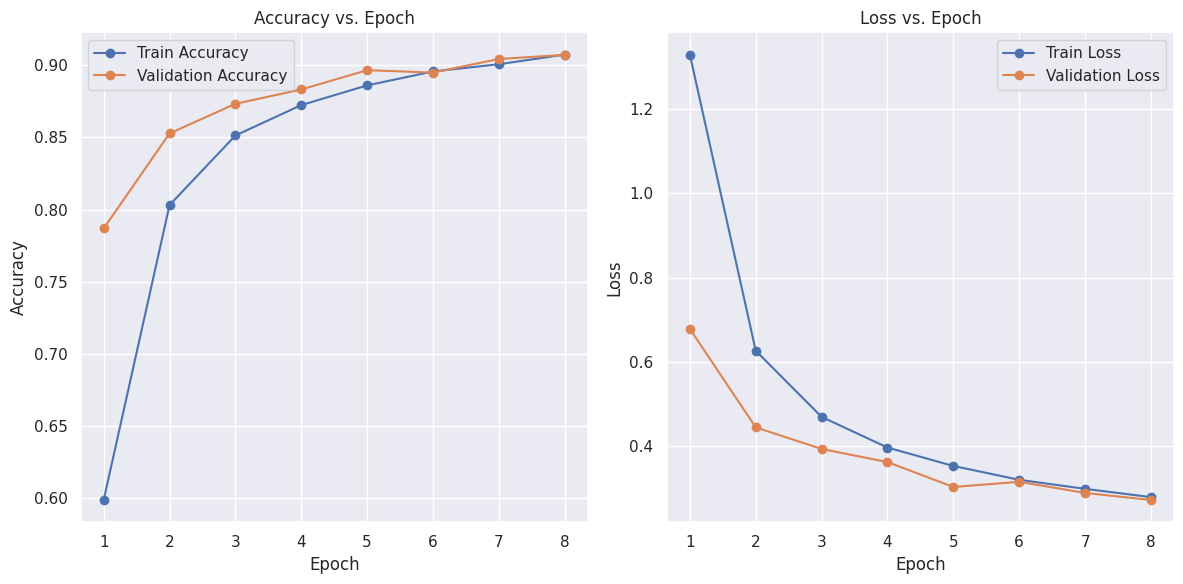

In [57]:
# Load training history from the JSON file
with open('/content/data_set/lstm_epochs_8_history.json', 'r') as json_file:
    history_data = json.load(json_file)

N = len(history_data['accuracy'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, N+1), history_data["accuracy"], label="Train Accuracy", marker='o')
plt.plot(range(1, N+1), history_data["val_accuracy"], label="Validation Accuracy", marker='o')
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, N+1), history_data['loss'], label="Train Loss", marker='o')
plt.plot(range(1, N+1), history_data['val_loss'], label="Validation Loss", marker='o')
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

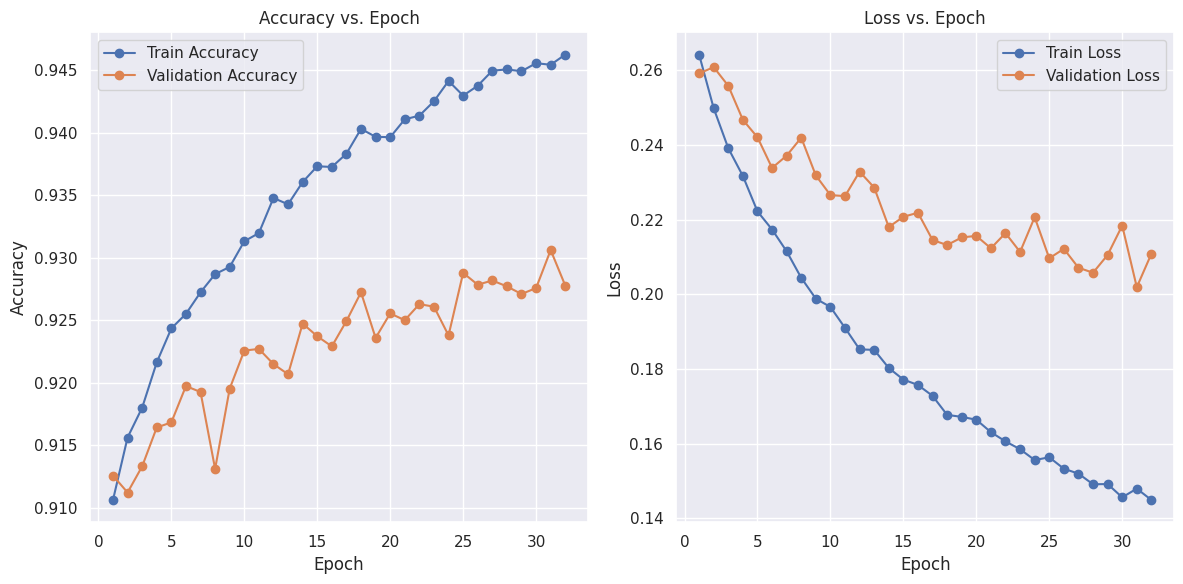

In [58]:
# Load training history from the JSON file
with open('/content/data_set/lstm_epochs_32_history.json', 'r') as json_file:
    history_data = json.load(json_file)

N = len(history_data['accuracy'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, N+1), history_data["accuracy"], label="Train Accuracy", marker='o')
plt.plot(range(1, N+1), history_data["val_accuracy"], label="Validation Accuracy", marker='o')
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, N+1), history_data['loss'], label="Train Loss", marker='o')
plt.plot(range(1, N+1), history_data['val_loss'], label="Validation Loss", marker='o')
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

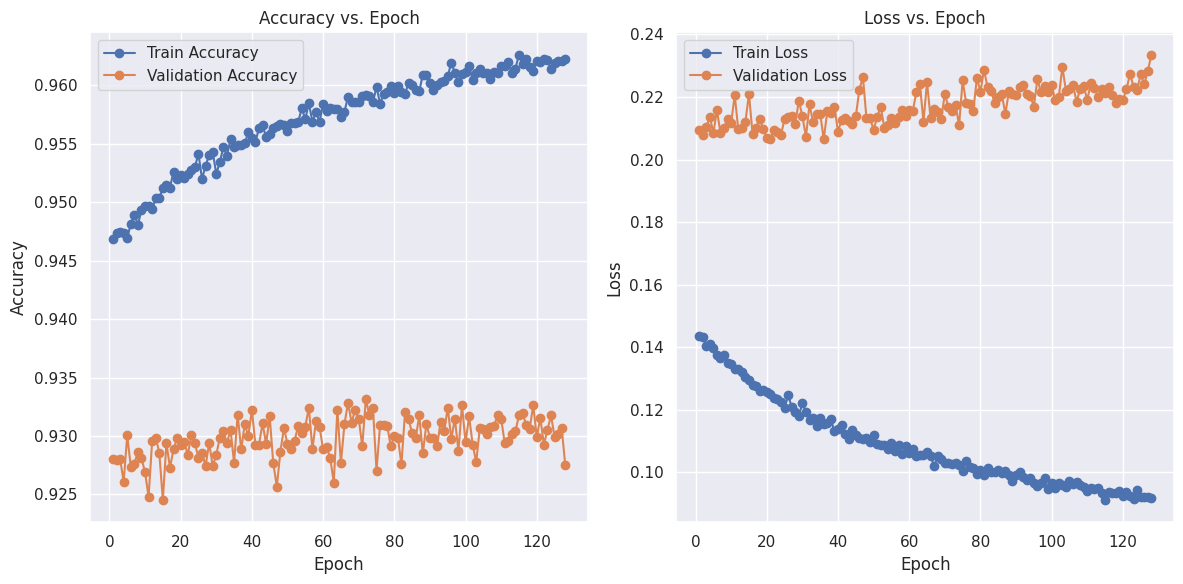

In [59]:
# Load training history from the JSON file
with open('/content/data_set/lstm_epochs_128_history.json', 'r') as json_file:
    history_data = json.load(json_file)

N = len(history_data['accuracy'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, N+1), history_data["accuracy"], label="Train Accuracy", marker='o')
plt.plot(range(1, N+1), history_data["val_accuracy"], label="Validation Accuracy", marker='o')
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, N+1), history_data['loss'], label="Train Loss", marker='o')
plt.plot(range(1, N+1), history_data['val_loss'], label="Validation Loss", marker='o')
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

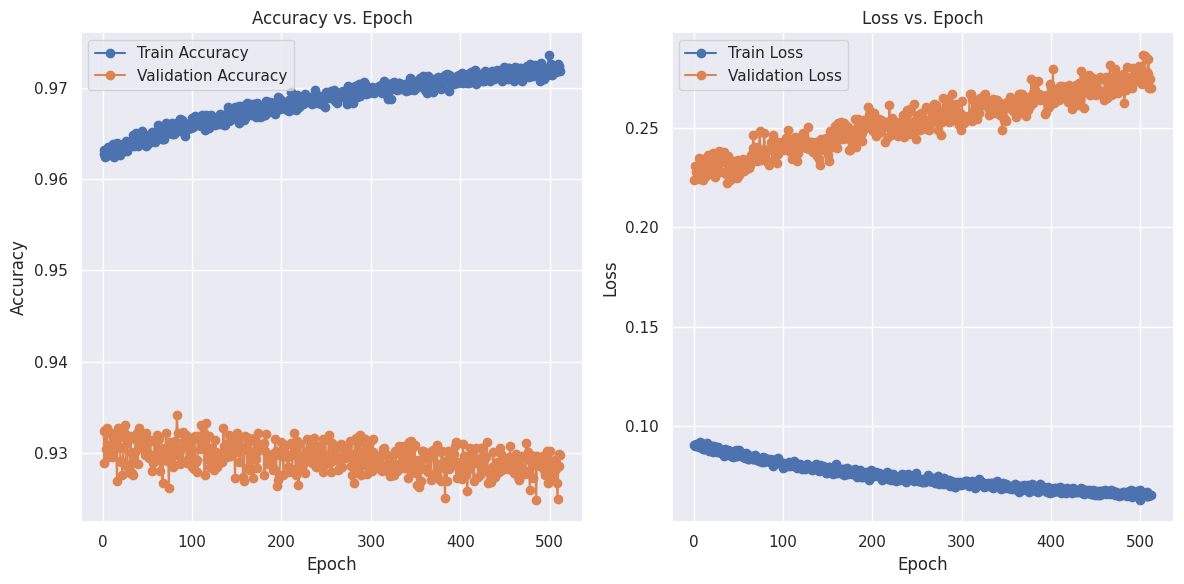

In [60]:
# Load training history from the JSON file
with open('/content/data_set/lstm_epochs_512_history.json', 'r') as json_file:
    history_data = json.load(json_file)

N = len(history_data['accuracy'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, N+1), history_data["accuracy"], label="Train Accuracy", marker='o')
plt.plot(range(1, N+1), history_data["val_accuracy"], label="Validation Accuracy", marker='o')
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, N+1), history_data['loss'], label="Train Loss", marker='o')
plt.plot(range(1, N+1), history_data['val_loss'], label="Validation Loss", marker='o')
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

### การเทรน rnn

In [ ]:
import numpy as np
import pandas as pd
import keras
import json
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Reshape, Flatten
from keras.preprocessing.image import ImageDataGenerator

def save_history(history, filename='history.json'):
    history_dict = history.history
    history_dict_for_json = {k: [float(i) for i in v] for k, v in history_dict.items()}
    with open(filename, 'w') as f:
        json.dump(history_dict_for_json, f)

def load_from_csv(train_file, test_file):
    train_data = pd.read_csv(train_file).values
    test_data = pd.read_csv(test_file).values

    train_images = train_data[:, 1:].reshape(-1, 28, 28, 1).astype('float32') / 255
    train_labels = train_data[:, 0]

    test_images = test_data[:, 1:].reshape(-1, 28, 28, 1).astype('float32') / 255
    test_labels = test_data[:, 0]

    return (train_images, train_labels), (test_images, test_labels)

train_file = 'data_set/emnist-letters-train.csv'
test_file = 'data_set/emnist-letters-test.csv'
(train_images, train_labels), (test_images, test_labels) = load_from_csv(train_file, test_file)

unique_labels = np.unique(train_labels)
num_classes = len(unique_labels) + 1

train_labels = keras.utils.to_categorical(train_labels,num_classes=num_classes)
test_labels = keras.utils.to_categorical(test_labels,num_classes=num_classes)

# Image augmentation setup
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(train_images)

# RNN Model setup
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Reshape((-1, 28)))
model.add(SimpleRNN(128, activation='relu', return_sequences=False))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

for epoch in [8,32,128,512]:
    history = model.fit(datagen.flow(train_images, train_labels, batch_size=128),
                        epochs=epoch,
                        validation_data=(test_images, test_labels),
                        steps_per_epoch=train_images.shape[0] // 128)

    save_history(history, "./rnn_epochs_"+str(epoch)+"_history.json")
    model.save("./rnn_epochs_"+str(epoch)+".h5")


### การเทรน lstm

In [ ]:
import numpy as np
import pandas as pd
import keras
import json
from keras.models import Sequential
from keras.layers import Dense, LSTM, Reshape, Flatten
from keras.preprocessing.image import ImageDataGenerator

def save_history(history, filename='history.json'):
    history_dict = history.history
    history_dict_for_json = {k: [float(i) for i in v] for k, v in history_dict.items()}
    with open(filename, 'w') as f:
        json.dump(history_dict_for_json, f)

def load_from_csv(train_file, test_file):
    train_data = pd.read_csv(train_file).values
    test_data = pd.read_csv(test_file).values

    train_images = train_data[:, 1:].reshape(-1, 28, 28, 1).astype('float32') / 255
    train_labels = train_data[:, 0]

    test_images = test_data[:, 1:].reshape(-1, 28, 28, 1).astype('float32') / 255
    test_labels = test_data[:, 0]

    return (train_images, train_labels), (test_images, test_labels)

train_file = 'data_set/emnist-letters-train.csv'
test_file = 'data_set/emnist-letters-test.csv'
(train_images, train_labels), (test_images, test_labels) = load_from_csv(train_file, test_file)

unique_labels = np.unique(train_labels)
num_classes = len(unique_labels) + 1

train_labels = keras.utils.to_categorical(train_labels,num_classes=num_classes)
test_labels = keras.utils.to_categorical(test_labels,num_classes=num_classes)

# Image augmentation setup
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(train_images)

# LSTM Model setup
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Reshape((-1, 28)))
model.add(LSTM(128, activation='tanh', return_sequences=False))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

for epoch in [8,32,128,512]:
    history = model.fit(datagen.flow(train_images, train_labels, batch_size=128),
                        epochs=epoch,
                        validation_data=(test_images, test_labels),
                        steps_per_epoch=train_images.shape[0] // 128)

    save_history(history, "./lstm_epochs_"+str(epoch)+"_history.json")
    model.save("./lstm_epochs_"+str(epoch)+".h5")